In [217]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [218]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [219]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [220]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(len(results))

1700


In [221]:
# 2. Convert the June temperatures to a list.
print(type(results))

<class 'list'>


In [222]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['Date','June Temps'])
df

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [223]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [224]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [225]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(len(results))

1517


In [226]:
# 7. Convert the December temperatures to a list.
print(type(results))

<class 'list'>


In [227]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['Date','December Temps'])
df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [228]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Determine the precipitation values for the months of June and December

In [229]:
# Write a query that filters the Measurement table to retrieve the precpitation,temperatures for the month of June.
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
            filter(extract('month', Measurement.date) == 6).all()
print(len(results))

1700


In [230]:
# Create a DataFrame for the list of precipitaion and temperatures for the month of June.
df_jun = pd.DataFrame(results, columns=['Date','June Precipitation','June Temps'])
#df_jun

In [231]:
# List the summary statistics for the precipitation values for the month of June.
df_jun.describe()

,June Precipitation,June Temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [232]:
# Write a query that filters the Measurement table to retrieve the precpitation,temperatures for the month of December.
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
            filter(extract('month', Measurement.date) == 12).all()
print(len(results))

1517


In [233]:
# Create a DataFrame for the list of precipitaion and temperatures for the month of December.
df_dec = pd.DataFrame(results, columns=['Date','December Precipitation','December Temps'])
#df_dec.style.hide_index()

In [234]:
# List the summary statistics for the precipitation values for the month of December.
df_dec.describe()

,December Precipitation,December Temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


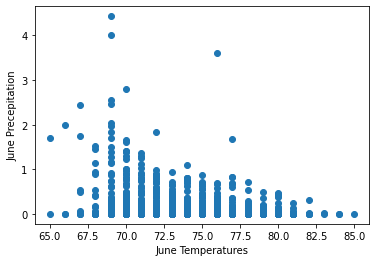

In [235]:
# Plot the precepitaion vs temperature of June
plt.scatter(df_jun['June Temps'],df_jun['June Precipitation'])
plt.xlabel('June Temperatures')
plt.ylabel('June Precepitation')
plt.show()

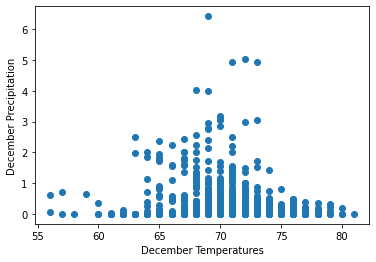

In [236]:
# Plot the precepitaion vs temperature of December
plt.scatter(df_dec['December Temps'],df_dec['December Precipitation'])
plt.xlabel('December Temperatures')
plt.ylabel('December Precipitation')
plt.show()

In [237]:
# Write a query that filters the Measurement table to retrieve the precpitation,temperatures for the year 2017.
results = []
results = session.query(Measurement.prcp,Measurement.tobs).\
    filter(extract('year',Measurement.date) == 2017).all()
print(len(results))

1397


In [238]:
# Create a DataFrame for the list of precipitaion and temperatures for the year and list the summary statistics.
df_year = pd.DataFrame(results, columns=['Precipitation', 'Temperatures'])
df_year.style.hide_index()
df_year.describe()

,Precipitation,Temperatures
count,1267.000000,1397.000000
mean,0.165927,74.143880
std,0.453913,4.927997
min,0.000000,58.000000
25%,0.000000,71.000000
50%,0.000000,75.000000
75%,0.105000,78.000000
max,6.250000,87.000000


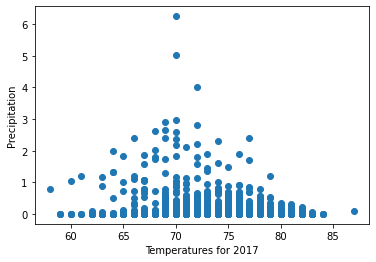

In [239]:
plt.scatter(df_year['Temperatures'], df_year['Precipitation'])
plt.xlabel('Temperatures for 2017')
plt.ylabel('Precipitation')
plt.show()

In [240]:
# 10. Return to your challenge instructions to compare your summary statistics